# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DataFrame Building

In [2]:
#DataFrame Building function
def build_data_frame():
    return (
pd.read_csv(incident)[["INCIDENT_ID","NIBRS_MONTH_ID","INCIDENT_HOUR"]]
.merge(pd.read_csv(month)
      [["NIBRS_MONTH_ID","MONTH_NUM"]],
      on="NIBRS_MONTH_ID", how="left") 
    #4105 rows after merge
    
.merge(pd.read_csv(offense)
    [["INCIDENT_ID","OFFENSE_ID","OFFENSE_TYPE_ID","LOCATION_ID"]], on="INCIDENT_ID", how="left") 
    #4510 rows(+405 rows) after merge. One incident may have several offenses
    
.merge(pd.read_csv(location)
    [["LOCATION_ID","LOCATION_NAME"]],
      on="LOCATION_ID", how="left") 
    #still 4510 rows afet merge
    
.merge(pd.read_csv(offense_type)
    [["OFFENSE_TYPE_ID","OFFENSE_NAME","CRIME_AGAINST","OFFENSE_CATEGORY_NAME"]], 
       on="OFFENSE_TYPE_ID", how="left")
    #still 4510 rows after merge
    
.merge(pd.read_csv(offender)
    [["INCIDENT_ID","OFFENDER_ID","SEX_CODE","AGE_ID","AGE_NUM","AGE_RANGE_LOW_NUM","AGE_RANGE_HIGH_NUM"]]
    .rename(columns=
               {
                   "SEX_CODE": "offender_gender",
                   "AGE_ID": "offender_age_id",
                   "AGE_NUM": "offender_age",
                   "AGE_RANGE_LOW_NUM":"offender_age_range_low",
                   "AGE_RANGE_HIGH_NUM": "offender_age_range_high"
               }), 
       on="INCIDENT_ID", how="left")
    #6305 rows (+1795 rows) after merge. One incident may have several offenders
    
.merge(pd.read_csv(victim)
    [["INCIDENT_ID","VICTIM_ID","VICTIM_TYPE_ID","SEX_CODE","AGE_ID","AGE_NUM","AGE_RANGE_LOW_NUM","AGE_RANGE_HIGH_NUM","RESIDENT_STATUS_CODE"]]
       .rename(columns=
               {
                   "SEX_CODE": "victim_gender",
                   "AGE_ID": "victim_age_id",
                   "AGE_NUM": "victim_age",
                   "AGE_RANGE_LOW_NUM": "victim_age_range_low",
                   "AGE_RANGE_HIGH_NUM": "victim_age_range_high",
                   "RESIDENT_STATUS_CODE": "victim_resident_code"
               }),
       on="INCIDENT_ID", how="left")
    #7674 rows (+1369 rows) after merge. One victime may have several offenders
    
.merge(pd.read_csv(victim_type)
    [["VICTIM_TYPE_ID","VICTIM_TYPE_NAME"]],
      on="VICTIM_TYPE_ID", how="left")
    #still 7674 rows after merge
    
.merge(pd.read_csv(circumstances_victim_correspondance)
    [["VICTIM_ID","CIRCUMSTANCES_ID"]],
      on="VICTIM_ID", how="left")
    #still 7674 rows after merge
    
.merge(pd.read_csv(circumstances_list)
    [["CIRCUMSTANCES_ID","CIRCUMSTANCES_NAME"]],
      on="CIRCUMSTANCES_ID", how="left")
    #still 7674 rows after merge
    
#.merge(pd.read_csv(bias_offense_id_correspondance)
#    [["OFFENSE_ID","BIAS_ID"]],
#      on="OFFENSE_ID", how="left")
#    #still 7674 rows after merge
    
#.merge(pd.read_csv(bias_list)
#    [["BIAS_ID","BIAS_CATEGORY","BIAS_DESC"]],
#      on="BIAS_ID", how="left")
    #still 7674 rows after merge
    
#.merge(pd.read_csv(offender_victim_relationship)
#    [["VICTIM_ID","RELATIONSHIP_ID"]],
#      on="VICTIM_ID", how="left")
#    #15786 rows (+8112 rows) after merge. One victim may have several relationships (several offenders)

#.merge(pd.read_csv(relationships_list)
#    [["RELATIONSHIP_ID","RELATIONSHIP_NAME","RELATIONSHIP_TYPE_ID"]],
#      on="RELATIONSHIP_ID", how="left")
#    #still 15786 rows after merge
#    #15786 rows × 34 columns
.drop_duplicates()
)

In [3]:
iteration = 0
for i in range(2017,2020):
#x="2017"
    x = str(i)
    incident = "Data/DC_"+x+"/NIBRS_INCIDENT.csv"
    offense = "Data/DC_"+x+"/NIBRS_OFFENSE.csv"
    offense_type = "Data/DC_"+x+"/NIBRS_OFFENSE_TYPE.csv"
    offender = "Data/DC_"+x+"/NIBRS_OFFENDER.csv"
    victim = "Data/DC_"+x+"/NIBRS_VICTIM.csv"
    victim_type = "Data/DC_"+x+"/NIBRS_VICTIM_TYPE.csv"
    month = "Data/DC_"+x+"/NIBRS_month.csv"
    location = "Data/DC_"+x+"/NIBRS_LOCATION_TYPE.csv"
    circumstances_victim_correspondance = "Data/DC_"+x+"/NIBRS_VICTIM_CIRCUMSTANCES.csv"
    circumstances_list = "Data/DC_"+x+"/NIBRS_CIRCUMSTANCES.csv"
    bias_list = "Data/DC_"+x+"/NIBRS_BIAS_LIST.csv"
    bias_offense_id_correspondance = "Data/DC_"+x+"/NIBRS_BIAS_MOTIVATION.csv"
    offender_victim_relationship = "Data/DC_"+x+"/NIBRS_VICTIM_OFFENDER_REL.csv"
    relationships_list = "Data/DC_"+x+"/NIBRS_RELATIONSHIP.csv"
#print(iteration)
    if iteration == 0:
#        print("True")
        df = build_data_frame()
    else:
        df_temp = build_data_frame()
        df = df.append(df_temp)
#print(iteration,incident, offense)
    iteration += 1
df

,INCIDENT_ID,NIBRS_MONTH_ID,INCIDENT_HOUR,MONTH_NUM,OFFENSE_ID,OFFENSE_TYPE_ID,LOCATION_ID,LOCATION_NAME,OFFENSE_NAME,CRIME_AGAINST,...,VICTIM_TYPE_ID,victim_gender,victim_age_id,victim_age,victim_age_range_low,victim_age_range_high,victim_resident_code,VICTIM_TYPE_NAME,CIRCUMSTANCES_ID,CIRCUMSTANCES_NAME
0,90848610,7629825,9.0,7,112968080,5,1,Air/Bus/Train Terminal,Destruction/Damage/Vandalism of Property,Property,...,3,NaN,NaN,NaN,NaN,NaN,NaN,Government,NaN,NaN
1,90848428,7629825,13.0,7,112967863,16,13,Highway/Road/Alley/Street/Sidewalk,Drug/Narcotic Violations,Society,...,8,NaN,NaN,NaN,NaN,NaN,NaN,Society/Public,NaN,NaN
2,90848294,7629825,12.0,7,112967713,51,1,Air/Bus/Train Terminal,Simple Assault,Person,...,4,M,5.0,23.0,23.0,0.0,R,Individual,NaN,NaN
3,90848298,7605220,23.0,6,112967717,14,18,Parking/Drop Lot/Garage,Theft From Motor Vehicle,Property,...,4,M,5.0,32.0,32.0,0.0,N,Individual,NaN,NaN
4,90848288,7605220,18.0,6,112967705,56,1,Air/Bus/Train Terminal,Fondling,Person,...,4,F,5.0,30.0,30.0,0.0,N,Individual,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7669,123059907,8226910,NaN,12,148906547,5,18,Parking/Drop Lot/Garage,Destruction/Damage/Vandalism of Property,Property,...,4,F,5.0,37.0,37.0,0.0,R,Individual,NaN,NaN
7670,123059907,8226910,NaN,12,148906547,5,18,Parking/Drop Lot/Garage,Destruction/Damage/Vandalism of Property,Property,...,4,F,5.0,57.0,57.0,0.0,R,Individual,NaN,NaN
7671,123059907,8226910,NaN,12,148906546,14,18,Parking/Drop Lot/Garage,Theft From Motor Vehicle,Property,...,4,M,5.0,68.0,68.0,0.0,R,Individual,NaN,NaN
7672,123059907,8226910,NaN,12,148906546,14,18,Parking/Drop Lot/Garage,Theft From Motor Vehicle,Property,...,4,F,5.0,37.0,37.0,0.0,R,Individual,NaN,NaN


# DataFrame cleaning

## General cleaning

In [4]:
def clean_df_func():
    return (df
 #filters
 [(df["VICTIM_TYPE_NAME"]=="Individual")
 &(df["victim_gender"]!="U")]
 
 #dropping columns with ID numbers and columns out of scope
 .drop(columns=[
     "NIBRS_MONTH_ID",
     "OFFENSE_ID",
     "OFFENSE_TYPE_ID",
     "LOCATION_ID",
     "CRIME_AGAINST",
     "OFFENDER_ID",
     "offender_gender",
     "offender_age_id",
     "offender_age",
     "offender_age_range_low",
     "offender_age_range_high",
     "VICTIM_TYPE_ID",
     "victim_age_id",
     "victim_age_range_low",
     "victim_age_range_high",
     "victim_resident_code",
     "CIRCUMSTANCES_ID",
     "CIRCUMSTANCES_NAME",
     "VICTIM_TYPE_NAME",
#     "BIAS_ID",
#     "RELATIONSHIP_ID",
#     "RELATIONSHIP_NAME",
#     "RELATIONSHIP_TYPE_ID",
#     "BIAS_CATEGORY",
#     "BIAS_DESC",
     "OFFENSE_CATEGORY_NAME"
               ])
 
 #lower case for all
 .rename(columns=str.lower)
 .drop_duplicates()
 
  #dropping last ID columns and columns out of scope
 .drop(columns=[
     "incident_id",
     "victim_id"
                ])
 
 #filling NaN for incident hour column
 .fillna(15.5)
)

clean_df = clean_df_func()
clean_df

,incident_hour,month_num,location_name,offense_name,victim_gender,victim_age
2,12.0,7,Air/Bus/Train Terminal,Simple Assault,M,23.0
3,23.0,6,Parking/Drop Lot/Garage,Theft From Motor Vehicle,M,32.0
4,18.0,6,Air/Bus/Train Terminal,Fondling,F,30.0
5,6.0,1,Air/Bus/Train Terminal,All Other Larceny,M,31.0
6,8.0,1,Air/Bus/Train Terminal,All Other Larceny,M,41.0
...,...,...,...,...,...,...
7669,15.5,12,Parking/Drop Lot/Garage,Destruction/Damage/Vandalism of Property,F,37.0
7670,15.5,12,Parking/Drop Lot/Garage,Destruction/Damage/Vandalism of Property,F,57.0
7671,15.5,12,Parking/Drop Lot/Garage,Theft From Motor Vehicle,M,68.0
7672,15.5,12,Parking/Drop Lot/Garage,Theft From Motor Vehicle,F,37.0


In [5]:
#checking there are no more NaN values
clean_df.isna().sum()

incident_hour    0
month_num        0
location_name    0
offense_name     0
victim_gender    0
victim_age       0
dtype: int64

In [6]:
clean_df["offense_name"].value_counts()

Simple Assault                                 2863
Destruction/Damage/Vandalism of Property       1183
All Other Larceny                              1004
Robbery                                         984
Purse-snatching                                 618
Theft From Motor Vehicle                        559
Aggravated Assault                              404
Intimidation                                    319
Fondling                                        178
Pocket-picking                                  159
Theft of Motor Vehicle Parts or Accessories     135
Motor Vehicle Theft                             118
Stolen Property Offenses                         77
Weapon Law Violations                            64
Drug/Narcotic Violations                         33
Kidnapping/Abduction                             17
Credit Card/Automated Teller Machine Fraud       13
False Pretenses/Swindle/Confidence Game          10
Theft From Building                               8
Drug Equipme

## Further cleaning (because of imbalance)

In [7]:
dict = {
    "Stolen Property Offenses":"Other_less_common",
    "Weapon Law Violations":"Other_less_common",
    "Drug/Narcotic Violations": "Other_less_common",
    "Kidnapping/Abduction": "Other_less_common",
    "Credit Card/Automated Teller Machine Fraud": "Other_less_common",
    "False Pretenses/Swindle/Confidence Game": "Other_less_common",
    "Theft From Building": "Other_less_common",    
    "Drug Equipment Violations": "Other_less_common",
    "Rape": "Other_less_common",
    "Sodomy": "Other_less_common",
    "Counterfeiting/Forgery": "Other_less_common",
    "Burglary/Breaking & Entering": "Other_less_common",
    "Impersonation": "Other_less_common",
    "Prostitution": "Other_less_common",
    "Extortion/Blackmail": "Other_less_common"
        }

# Dropping rows with "Simple Assault"
df_ready = (clean_df
 [clean_df["offense_name" ]!="Simple Assault"]
 
# Replacing (grouping) values whose occurrence is less than 100 "Other_less_common" 
 .replace({"offense_name": dict})
)

In [8]:
df_ready["offense_name"].value_counts()

Destruction/Damage/Vandalism of Property       1183
All Other Larceny                              1004
Robbery                                         984
Purse-snatching                                 618
Theft From Motor Vehicle                        559
Aggravated Assault                              404
Intimidation                                    319
Other_less_common                               244
Fondling                                        178
Pocket-picking                                  159
Theft of Motor Vehicle Parts or Accessories     135
Motor Vehicle Theft                             118
Name: offense_name, dtype: int64

In [9]:
df_ready

,incident_hour,month_num,location_name,offense_name,victim_gender,victim_age
3,23.0,6,Parking/Drop Lot/Garage,Theft From Motor Vehicle,M,32.0
4,18.0,6,Air/Bus/Train Terminal,Fondling,F,30.0
5,6.0,1,Air/Bus/Train Terminal,All Other Larceny,M,31.0
6,8.0,1,Air/Bus/Train Terminal,All Other Larceny,M,41.0
12,18.0,8,Air/Bus/Train Terminal,Pocket-picking,F,52.0
...,...,...,...,...,...,...
7669,15.5,12,Parking/Drop Lot/Garage,Destruction/Damage/Vandalism of Property,F,37.0
7670,15.5,12,Parking/Drop Lot/Garage,Destruction/Damage/Vandalism of Property,F,57.0
7671,15.5,12,Parking/Drop Lot/Garage,Theft From Motor Vehicle,M,68.0
7672,15.5,12,Parking/Drop Lot/Garage,Theft From Motor Vehicle,F,37.0


# Data Transformation

In [10]:
def ready_x_data_func(already_cleaned_df):
    if "offense_name" in already_cleaned_df.columns:
        location_dummies = pd.get_dummies(already_cleaned_df[["location_name"]])
        gender_dummies = pd.get_dummies(already_cleaned_df[["victim_gender"]], drop_first=True)
        df_minus_dummies = already_cleaned_df.drop(columns=["location_name","offense_name","victim_gender"])
        return pd.concat([location_dummies, gender_dummies, df_minus_dummies], axis=1)
    else:
        location_dummies = pd.get_dummies(already_cleaned_df[["location_name"]])
        gender_dummies = pd.get_dummies(already_cleaned_df[["victim_gender"]], drop_first=True)
        df_minus_dummies = already_cleaned_df.drop(columns=["location_name","victim_gender"])
        return pd.concat([location_dummies, gender_dummies, df_minus_dummies], axis=1)

# Modelling

## Modelling libraries

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from imblearn.over_sampling import SMOTE

## X and y definition

In [12]:
X = ready_x_data_func(df_ready)
X

,location_name_Air/Bus/Train Terminal,location_name_Bank/Savings and Loan,location_name_Commercial/Office Building,location_name_Government/Public Building,location_name_Highway/Road/Alley/Street/Sidewalk,location_name_Industrial Site,location_name_Other/Unknown,location_name_Parking/Drop Lot/Garage,location_name_Residence/Home,location_name_School/College,victim_gender_M,incident_hour,month_num,victim_age
3,0,0,0,0,0,0,0,1,0,0,1,23.0,6,32.0
4,1,0,0,0,0,0,0,0,0,0,0,18.0,6,30.0
5,1,0,0,0,0,0,0,0,0,0,1,6.0,1,31.0
6,1,0,0,0,0,0,0,0,0,0,1,8.0,1,41.0
12,1,0,0,0,0,0,0,0,0,0,0,18.0,8,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7669,0,0,0,0,0,0,0,1,0,0,0,15.5,12,37.0
7670,0,0,0,0,0,0,0,1,0,0,0,15.5,12,57.0
7671,0,0,0,0,0,0,0,1,0,0,1,15.5,12,68.0
7672,0,0,0,0,0,0,0,1,0,0,0,15.5,12,37.0


In [13]:
y = df_ready["offense_name"]
y

3                       Theft From Motor Vehicle
4                                       Fondling
5                              All Other Larceny
6                              All Other Larceny
12                                Pocket-picking
                          ...                   
7669    Destruction/Damage/Vandalism of Property
7670    Destruction/Damage/Vandalism of Property
7671                    Theft From Motor Vehicle
7672                    Theft From Motor Vehicle
7673                    Theft From Motor Vehicle
Name: offense_name, Length: 5905, dtype: object

0.4051918735891648


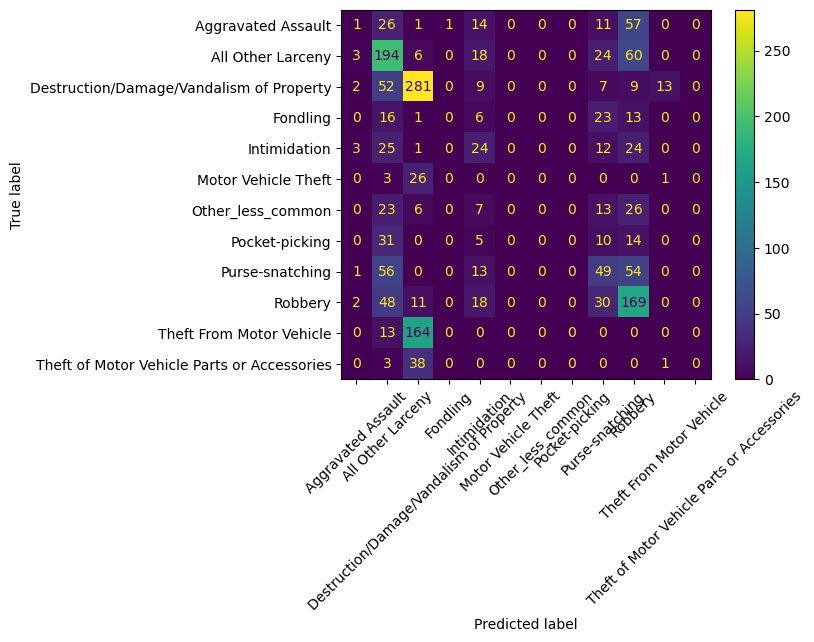

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
clf = RandomForestClassifier(max_depth=7, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
plot_confusion_matrix(clf,X_test,y_test);
plt.xticks(rotation=45)
plt.show()

In [15]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [16]:
y_sm.value_counts()

Aggravated Assault                             810
All Other Larceny                              810
Destruction/Damage/Vandalism of Property       810
Theft of Motor Vehicle Parts or Accessories    810
Robbery                                        810
Fondling                                       810
Purse-snatching                                810
Other_less_common                              810
Theft From Motor Vehicle                       810
Intimidation                                   810
Pocket-picking                                 810
Motor Vehicle Theft                            810
Name: offense_name, dtype: int64

0.7304526748971193


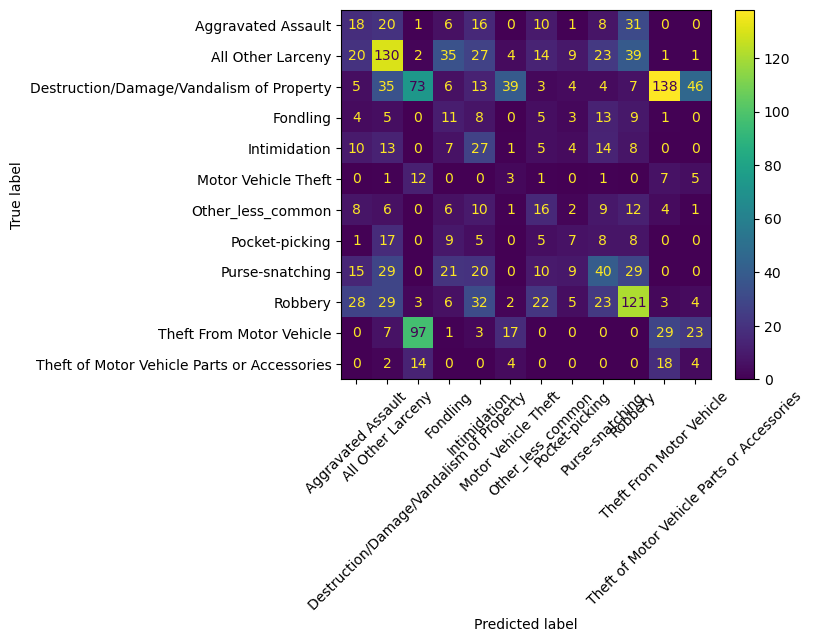

In [17]:
clf_sm = RandomForestClassifier(max_depth=11, random_state=0)
clf_sm.fit(X_sm, y_sm)
print(clf_sm.score(X_sm, y_sm))
plot_confusion_matrix(clf_sm,X_test,y_test);
plt.xticks(rotation=45)
plt.show()
#grid_search+cross validation next possible steps

# UX

In [18]:
import ipywidgets as widgets

In [19]:
X_sm.columns

Index(['location_name_Air/Bus/Train Terminal',
       'location_name_Bank/Savings and Loan',
       'location_name_Commercial/Office Building',
       'location_name_Government/Public Building',
       'location_name_Highway/Road/Alley/Street/Sidewalk',
       'location_name_Industrial Site', 'location_name_Other/Unknown',
       'location_name_Parking/Drop Lot/Garage', 'location_name_Residence/Home',
       'location_name_School/College', 'victim_gender_M', 'incident_hour',
       'month_num', 'victim_age'],
      dtype='object')

In [20]:
user_df = pd.DataFrame(
    {
        'location_name_Air/Bus/Train Terminal':[0],
        'location_name_Bank/Savings and Loan':[0],
        'location_name_Commercial/Office Building':[0],
        'location_name_Government/Public Building':[0],
        'location_name_Highway/Road/Alley/Street/Sidewalk':[0],
        'location_name_Industrial Site':[0],
        'location_name_Other/Unknown':[0],
        'location_name_Parking/Drop Lot/Garage':[0],
        'location_name_Residence/Home':[0],
        'location_name_School/College':[0],
        'victim_gender_M':[0],
        'incident_hour':[0],
        'month_num':[0],
        'victim_age':[0] 
    }
)
user_df

,location_name_Air/Bus/Train Terminal,location_name_Bank/Savings and Loan,location_name_Commercial/Office Building,location_name_Government/Public Building,location_name_Highway/Road/Alley/Street/Sidewalk,location_name_Industrial Site,location_name_Other/Unknown,location_name_Parking/Drop Lot/Garage,location_name_Residence/Home,location_name_School/College,victim_gender_M,incident_hour,month_num,victim_age
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
user_df.columns
locations_dict_correspondance = {
    'location_name_Air/Bus/Train Terminal': 0,
    'location_name_Bank/Savings and Loan': 1,
    'location_name_Commercial/Office Building': 2,
    'location_name_Government/Public Building': 3,
    'location_name_Highway/Road/Alley/Street/Sidewalk': 4,
    'location_name_Industrial Site': 5,
    'location_name_Other/Unknown': 6,
    'location_name_Parking/Drop Lot/Garage': 7,
    'location_name_Residence/Home': 8,
    'location_name_School/College': 9
}

In [22]:
#location widget
location_choice = widgets.Dropdown(
    options=[
        ('Air/Bus/Train Terminal','location_name_Air/Bus/Train Terminal'),
        ('Parking/Drop Lot/Garage','location_name_Parking/Drop Lot/Garage'),
        ('Highway/Road/Alley/Street/Sidewalk','location_name_Highway/Road/Alley/Street/Sidewalk'),
        ('Other/Unknown','location_name_Other/Unknown'),
        ('Commercial/Office Building','location_name_Commercial/Office Building'), 
        ('Government/Public Building','location_name_Government/Public Building'),
        ('Residence/Home','location_name_Residence/Home'), 
        ('School/College','location_name_School/College'), 
        ('Bank/Savings and Loan','location_name_Bank/Savings and Loan'),
        ('Industrial Site','location_name_Industrial Site')
   ],
    value="location_name_Parking/Drop Lot/Garage",
    description="Location",)

#incident hour widget
incident_hour_choice = widgets.Dropdown(
    options = np.arange(0,24,1),
    value=0,
    description="Hour",)

#incident month choice
incident_month_choice = widgets.Dropdown(
    options = np.arange(0,13,1),
    value=0,
    description="Month",)

#victim gender choice
victim_gender_choice = widgets.Dropdown(
    options = ["M","F"],
    value="M",
    description="Victim Gender",)


#victim age
#victim gender choice
victim_age_choice = widgets.Dropdown(
    options = np.arange(1,93,1),
    value=1,
    description="Victim Age",)

display(location_choice)
display(incident_hour_choice)
display(incident_month_choice)
display(victim_gender_choice)
display(victim_age_choice)

Dropdown(description='Location', index=1, options=(('Air/Bus/Train Terminal', 'location_name_Air/Bus/Train Ter…

Dropdown(description='Hour', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20…

Dropdown(description='Month', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), value=0)

Dropdown(description='Victim Gender', options=('M', 'F'), value='M')

Dropdown(description='Victim Age', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,…

In [24]:
#reset user DataFrame
user_df.loc[:,:] = 0

#insert values into user DataFrame...

#insert location info
user_df.iloc[0,locations_dict_correspondance[location_choice.value]] = 1

#insert gender info
if victim_gender_choice.value == "M":
    user_df.iloc[0,10] = 1
    
#insert hour info
user_df.iloc[0,11] = incident_hour_choice.value

#insert month info
user_df.iloc[0,12] = incident_month_choice.value

#insert age info
user_df.iloc[0,13] = victim_age_choice.value
print("Estimated type of offense: ",clf_sm.predict(user_df))

Estimated type of offense:  ['Aggravated Assault']
